In [193]:
from sympy import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [194]:
H_s, H_jw, mod_H_jw, phi, s, t, vi, vo, va, r1, r2, r3, r4, c, Hs, w = symbols("H_s H_jw |H_jw| phi s t vi vo va r1 r2 r3 r4 c Hs w")

eq1 = Eq((va - vi)*s*c + (va - vo)*(1/r1) + (va - vo)*s*c, 0)
eq1

Eq(c*s*(va - vi) + c*s*(va - vo) + (va - vo)/r1, 0)

In [195]:
eq2 = Eq(va, vo*((1/r2)+s*c)/(s*c))
eq2

Eq(va, vo*(c*s + 1/r2)/(c*s))

In [196]:
sol = linsolve([eq1, eq2], (vo,va))
sol

{(c**2*r1*r2*s**2*vi/(c**2*r1*r2*s**2 + 2*c*r1*s + 1), (c**2*r1*r2*s**2*vi + c*r1*s*vi)/(c**2*r1*r2*s**2 + 2*c*r1*s + 1))}

In [197]:
Vo = sol.args[0][0]

H1 = Vo/vi 
Eq(H_s, H1)

Eq(H_s, c**2*r1*r2*s**2/(c**2*r1*r2*s**2 + 2*c*r1*s + 1))

In [198]:
eq3 = Eq((va - vi)*s*c + (va - vo)*(1/r3) + (va - vo)*s*c, 0)
eq4 = Eq(va, vo*((1/r4)+s*c)/(s*c))
sol = linsolve([eq3, eq4], (vo,va))
Vo = sol.args[0][0]
H2 = Vo/vi 
H2

c**2*r3*r4*s**2/(c**2*r3*r4*s**2 + 2*c*r3*s + 1)

In [199]:
Hs = H1*H2
Eq(H_s, Hs)

Eq(H_s, c**4*r1*r2*r3*r4*s**4/((c**2*r1*r2*s**2 + 2*c*r1*s + 1)*(c**2*r3*r4*s**2 + 2*c*r3*s + 1)))

In [200]:
Hs.subs({c:100e-9, r1:6127, r2:41587,r3:14705,r4:17220})

6.45213801581349e-12*s**4/((2.532201e-6*s**2 + 0.002941*s + 1)*(2.54803549e-6*s**2 + 0.0012254*s + 1))

In [201]:
# Substituindo s = jw

Hjw = Hs.subs(s, I*w)
Eq(H_jw,Hjw)

Eq(H_jw, c**4*r1*r2*r3*r4*w**4/((-c**2*r1*r2*w**2 + 2*I*c*r1*w + 1)*(-c**2*r3*r4*w**2 + 2*I*c*r3*w + 1)))

In [202]:
Eq(H_jw,Hjw).subs({c:100e-9, r1:6127, r2:41587,r3:14705,r4:17220})

Eq(H_jw, 6.45213801581349e-12*w**4/((-2.54803549e-6*w**2 + 0.0012254*I*w + 1)*(-2.532201e-6*w**2 + 0.002941*I*w + 1)))

In [203]:
#Calculando Modulo
mod_Hjw = Eq(mod_H_jw,abs(Hjw))
mod_Hjw

Eq(|H_jw|, Abs(c**4*r1*r2*r3*r4*w**4/((-c**2*r1*r2*w**2 + 2*I*c*r1*w + 1)*(-c**2*r3*r4*w**2 + 2*I*c*r3*w + 1))))

In [204]:
#resposta em radiano, se liga
Eq(phi,deg(arg(Hjw)))

Eq(phi, 180*arg(c**4*r1*r2*r3*r4*w**4/((-c**2*r1*r2*w**2 + 2*I*c*r1*w + 1)*(-c**2*r3*r4*w**2 + 2*I*c*r3*w + 1)))/pi)

In [205]:
mod_Hjw_subs = mod_Hjw.subs({c:100e-9, r1:6127, r2:41587,r3:14705,r4:17220})
mod_Hjw_subs

Eq(|H_jw|, 6.45213801581349e-12*Abs(w**4/((-2.54803549e-6*w**2 + 0.0012254*I*w + 1)*(-2.532201e-6*w**2 + 0.002941*I*w + 1))))

In [206]:
Hjw_subs = Hjw.subs({c:100e-9, r1:6127, r2:41587,r3:14705,r4:17220})
Hjw_denom = denom(Hjw_subs)
Hjw_polos = solve(Hjw_denom, w)
Hjw_polos
Eq(H_jw,Hjw_subs)

Eq(H_jw, 6.45213801581349e-12*w**4/((-2.54803549e-6*w**2 + 0.0012254*I*w + 1)*(-2.532201e-6*w**2 + 0.002941*I*w + 1)))

In [207]:
Hjw_polos

[-578.479313420915 + 240.459759059321*I,
 -240.161469991273 + 580.720092915215*I,
 240.161469991273 + 580.720092915215*I,
 578.479313420915 + 240.459759059321*I]

In [208]:
#resposta em radiano, se liga
Fase = Eq(phi,deg(arg(Hjw_subs)))
Fase

Eq(phi, 180*arg(w**4/((-2.54803549e-6*w**2 + 0.0012254*I*w + 1)*(-2.532201e-6*w**2 + 0.002941*I*w + 1)))/pi)

In [209]:
mod_H_zero = mod_Hjw_subs.subs(w,0)
mod_H_zero

Eq(|H_jw|, 0)

In [210]:
#freq 100Hz
Mod1=abs(Hjw_subs)
Arg1=deg(arg(Hjw_subs))
float(Mod1.subs(w,2*pi*100)), float(Arg1.subs(w,2*pi*100))

(0.7067692127914706, 179.56930552862335)

In [211]:
#freq 100Hz
Mod1=abs(Hjw_subs)
Arg1=deg(arg(Hjw_subs))
float(Mod1.subs(w,2*pi*200)), float(Arg1.subs(w,2*pi*200))

(0.9962950969941358, 77.9331053301367)

In [212]:
# calcular o módulo e o argumento em cada frequência

def calcular_respostas(frequencias):
    resultados = []
    for i, freq in enumerate(frequencias):  # Usando enumerate para indexar corretamente
        omega = 2 * pi * freq
        Mod = abs(Hjw_subs)
        Arg = deg(arg(Hjw_subs))
        Mod_value = float(Mod.subs(w, omega))
        Arg_value = float(Arg.subs(w, omega))

        resultados.append({
            'Frequência (Hz)': freq,
            'Módulo_Python': Mod_value,
            'Argumento_Python (Deg)': Arg_value,
        })

    return resultados

# Lista de frequencias em Hz
# frequencias = [0.01, 0.1, 1, 10, 100, 1000]
frequencias = np.logspace(-3, 5, num=100)


resultados = calcular_respostas(frequencias)
df = pd.DataFrame(resultados)


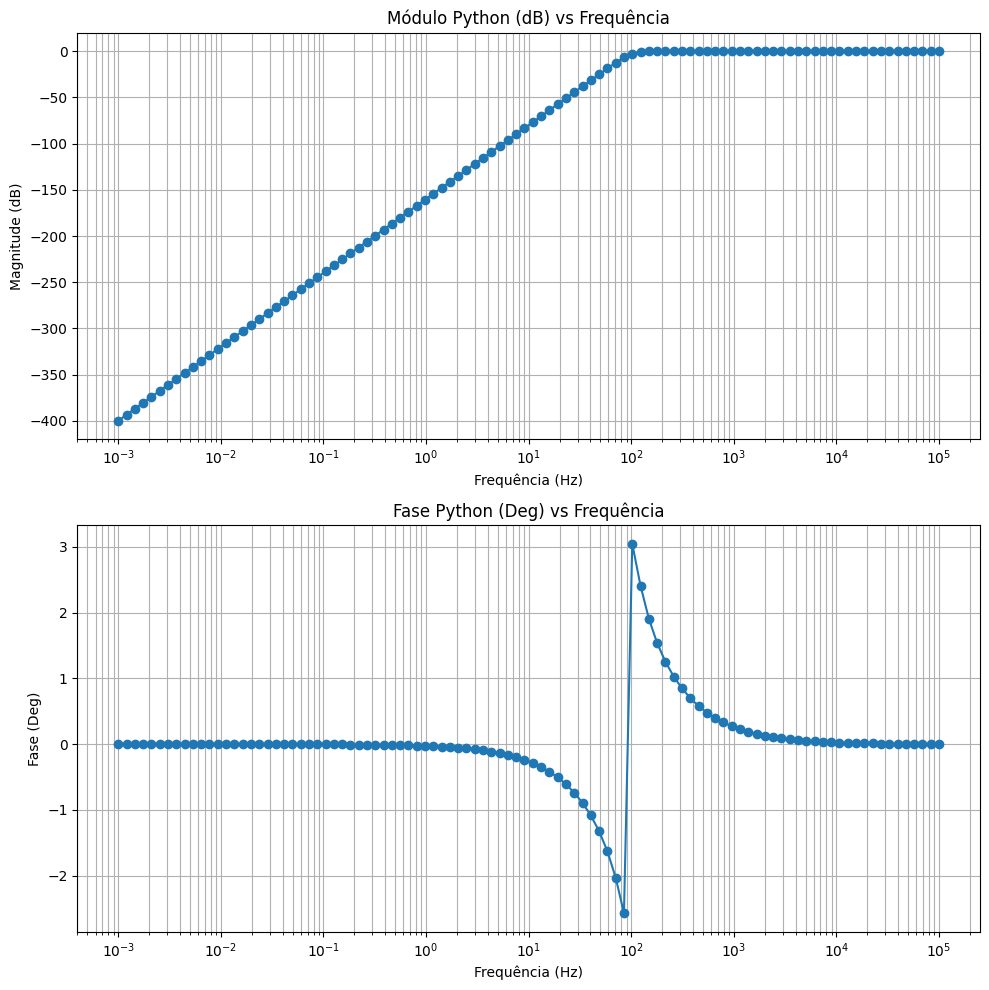

In [213]:
# Convertendo módulo para dB 
df['Módulo_Python'] = 20 * np.log10(df['Módulo_Python'])

# Plotando o diagrama de Bode
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Módulo em dB
axs[0].semilogx(df['Frequência (Hz)'], df['Módulo_Python'], marker='o', linestyle='-')
axs[0].set_title('Módulo Python (dB) vs Frequência')
axs[0].set_xlabel('Frequência (Hz)')
axs[0].set_ylabel('Magnitude (dB)')
axs[0].grid(True, which="both", ls="-")

# Fase em graus
axs[1].semilogx(df['Frequência (Hz)'], df['Argumento_Python (Deg)'], marker='o', linestyle='-')
axs[1].set_title('Fase Python (Deg) vs Frequência')
axs[1].set_xlabel('Frequência (Hz)')
axs[1].set_ylabel('Fase (Deg)')
axs[1].grid(True, which="both", ls="-")

plt.tight_layout()
plt.show()